In [1]:
import sys
sys.path.append("/glade/work/zilumeng/SSNLIM")
from slim import *
import pickle
import matplotlib.pyplot as plt
import cftime
import numpy as np
import pandas as pd
import xarray as xr
from EOF import EOF




In [3]:
with open("../LIM/eof_sst.pkl","rb") as f:
    sst_svd = pickle.load(f)
sst_svd.pc.shape

(30, 45540)

0



(721, 20)
3

(721, 20)
6

(721, 20)
9

(721, 20)
12

(721, 20)
15

(721, 20)
18

(721, 20)


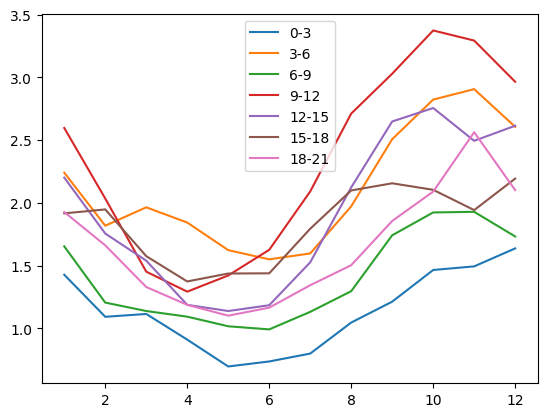

In [5]:
pc_num = 20
model_num0 = 15
model_num1 = 18
for model_num0 in range(0,20,3):
    print(model_num0)
    model_num1 = model_num0 + 3
    months = 1980
    pcs_tau0_ls = []
    pcs_tau1_ls = []
    for i in range(model_num0,model_num1):
        pc0 = sst_svd.pc.T[i*months:(i+1)*months,:pc_num]
        pcs_tau0_ls.append(pc0[:-1])
        pcs_tau1_ls.append(pc0[1:])
    # print(pc0.shape)

    pcs_tau0_ls = np.concatenate(pcs_tau0_ls,axis=0)
    pcs_tau1_ls = np.concatenate(pcs_tau1_ls,axis=0)
    print()
    months = np.repeat(np.arange(1,13)[np.newaxis,:],pcs_tau0_ls.shape[0]//12,axis=0)
    months = np.concatenate([months.reshape(-1),np.array([1.])],axis=0)
    lim = CSLIM(pcs_tau0_ls,pcs_tau1_ls,cycle_ind=months,fit_noise=True)
    preds = lim.noise_intergral(pcs_tau0_ls[[0]],months[0],length=720)[:,0]
    print(preds.shape)
    original_field = sst_svd.decoder1(preds)

    Nino34 = original_field[:,15:36,49:72].mean(axis=(1,2))
    
    times = pd.date_range(start='1980-12-01', periods=721, freq='MS')
    Nino34_array = xr.DataArray(Nino34,dims=['time'],coords={'time':times})

    vars = Nino34_array.groupby('time.month').var()
    plt.plot(np.arange(1,13),vars,label=f"{model_num0}-{model_num1}")

    lim.save(f"../LIM/lim/lim_sst_{model_num0}_{model_num1}.pkl")
plt.legend()
# plt.savefig(f"../LIM/pic/lim_{model_num0}_{model_num1}.png")

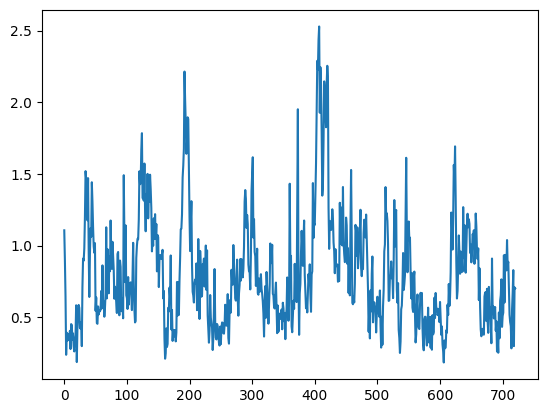

In [14]:
# months = np.concatenate([months.reshape(-1),np.array([1.,2.,3,4,5,6,7,8,9,10,11])],axis=0)

# months.shape
plt.plot(preds.var(axis=1))

In [172]:
preds.shape

(501, 15)

In [173]:
original_field.shape

(501, 9, 51, 120)

In [174]:
Nino34.shape

(501,)

In [175]:
times 

DatetimeIndex(['1980-12-01', '1981-01-01', '1981-02-01', '1981-03-01',
               '1981-04-01', '1981-05-01', '1981-06-01', '1981-07-01',
               '1981-08-01', '1981-09-01',
               ...
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01'],
              dtype='datetime64[ns]', length=501, freq='MS')

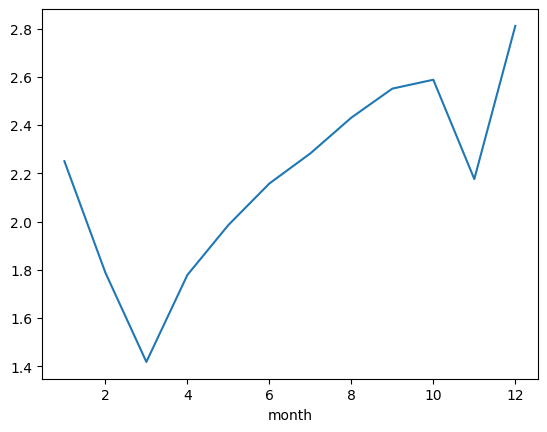

In [159]:
lim.save("../LIM/lim.pkl")